In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [96]:
df_raw = pd.read_csv('../output/csv_output/all_direct_routes_raw.csv', index_col=0, dtype={'num_transfers':'Int32'})
df_raw

,origin_id,destination_id,inner_path_id,route_id,from_id,to_id,transport_id,price_min_EUR,duration_min,distance_km,frequency_tpw,num_transfers
path_id,,,,,,,,,,,,
1160001,116,321,0,2,116,321,1,30,160,1668,19,0
1160002,116,321,1,2,116,321,1,45,255,1708,154,1
1160003,116,321,2,0,116,111,3,60,93,193,69,0
1110001,116,321,2,2,111,321,1,70,175,1852,55,0
1720001,116,321,3,5,172,321,1,40,165,1795,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2770660,217,129,4,5,277,129,1,118,430,1980,13,1
2330537,260,113,0,4,233,113,1,118,295,2343,38,1
3160629,260,113,2,5,316,113,1,69,185,2106,89,0


In [90]:
df_raw.query('index == 1720321')

,origin_id,destination_id,inner_path_id,route_id,from_id,to_id,transport_id,price_min_EUR,duration_min,distance_km,frequency_tpw,num_transfers
path_id,,,,,,,,,,,,
1720321,172,257,0,2,172,257,1,150,390,2357,6,1.0


In [87]:
single_direct_flights_indexes = set()
df_triples = df_raw[['from_id', 'to_id', 'transport_id', 'price_min_EUR', 'duration_min', 'num_transfers']].copy()
df_specific = df_triples.query('(transport_id == 1 and num_transfers == 0) or transport_id == 8')
for index in df_specific.index:
    from_id, to_id = df_specific.loc[index, ['from_id', 'to_id']]
    
    if not df_specific.query('from_id == @to_id and to_id == @from_id').empty: continue
    
    path_id = 1 + max(filter(lambda x: x > to_id * 10_000 and x < (to_id + 1 ) * 10_000 , df_triples.index))
    
    df_triples.at[path_id, 'from_id'] = to_id
    df_triples.at[path_id, 'to_id'] = from_id
    df_triples.at[path_id, 'transport_id'] = df_triples.at[index, 'transport_id']
    df_triples.at[path_id, 'price_min_EUR'] = df_triples.at[index, 'price_min_EUR']
    df_triples.at[path_id, 'duration_min'] = df_triples.at[index, 'duration_min']
    df_triples.at[path_id, 'num_transfers'] = df_triples.at[index, 'num_transfers']
    
    #print(path_id)
    single_direct_flights_indexes.add(path_id)

df_triples.loc[single_direct_flights_indexes, ['from_id', 'to_id', 'transport_id']]

,from_id,to_id,transport_id
path_id,,,
1720322,172.0,270.0,1.0
1720323,172.0,176.0,1.0
1720324,172.0,137.0,1.0
1720325,172.0,220.0,8.0
3530760,353.0,331.0,1.0
...,...,...,...
1640385,164.0,140.0,1.0
1050561,105.0,220.0,1.0
1050562,105.0,159.0,1.0


In [20]:
df_raw.query('from_id == 152 and to_id == 299 and num_transfers == 0')

,origin_id,destination_id,inner_path_id,route_id,from_id,to_id,transport_id,price_min_EUR,duration_min,distance_km,frequency_tpw,num_transfers
path_id,,,,,,,,,,,,


In [5]:
df_popular = pd.read_csv('../files/csv/most popular direct routes.csv', index_col=0)
df_popular

,from_id,to_id,transport_id,price_min_EUR,duration_min,counter
path_id,,,,,,
850045,85,60,2,3,21,326
3580054,358,307,2,5,81,326
560079,56,93,3,1,275,281
1470219,147,262,3,1,39,196
3570289,357,371,3,2,336,315
...,...,...,...,...,...,...
1910286,191,347,1,17,220,103
3480295,348,277,1,9,140,100
2140109,214,121,1,9,160,100


In [6]:
df_cities = pd.read_csv('../files/csv/cities.csv', names=['id_city', 'city', 'lat', 'lon'], usecols=['id_city', 'city'], index_col=0)
df_cities

,city
id_city,
8,Tehran
9,Tashkent
10,Sanaa
11,Phnom Penh
12,Naypyidaw
...,...
552,Ahmedabad
553,Aizawl
554,Allahabad


In [ ]:
euro_zone = range(100, 371)
from_city, to_city = list(), list()
df_flights_euro_validation = df_raw.query('(from_id and to_id) in @euro_zone and transport_id == 1 and num_transfers == 0')

df_flights_euro_validation = df_flights_euro_validation.rename(columns={'price_min_EUR': 'price', 
                                                                        'duration_min': 'duration',
                                                                        'distance_km': 'distance',
                                                                        'frequency_tpw': 'frequency'})
for from_id, to_id in df_flights_euro_validation[['from_id', 'to_id']].values:
        try:
            from_city.append(df_cities.query('id_city == @from_id')['city'].values[0])
            to_city.append(df_cities.query('id_city == @to_id')['city'].values[0])
        except Exception as err:
            continue
         
df_flights_euro_validation['from'], df_flights_euro_validation['to'] = from_city, to_city
df_flights_euro_validation['correct'] = ""
df_flights_euro_validation[['from', 'to', 'price', 'duration', 'distance', 'correct']]

,from,to,price,duration,distance,correct
path_id,,,,,,
3030001,Rome,Tirana,33,80,622,
2860003,Pescara,Tirana,47,75,471,
3030002,Rome,Sofia,28,105,895,
2020001,Innsbruck,London,95,110,973,
2020002,Innsbruck,Manchester,41,130,1179,
...,...,...,...,...,...,...
1610672,Duesseldorf,Krakow,65,110,927,
1970558,Hannover,Funchal,108,260,3054,
2360536,Ljubljana,Belgrade,57,80,481,


In [7]:
df_triples = pd.read_csv('../output/csv_output/all_direct_routes_triples.csv', index_col='path_id')
df_triples.shape

(82051, 6)

In [8]:
df_flights = df_triples.query('transport_id == 1')
df_flights.shape

(72509, 6)

In [9]:
df_flights_direct = df_flights.query('num_transfers == 0')
df_flights_direct

,from_id,to_id,transport_id,price_min_EUR,duration_min,num_transfers
path_id,,,,,,
80009,8,174,1,150,340,0.0
80017,8,145,1,170,350,0.0
80041,8,95,1,154,115,0.0
80068,8,93,1,206,230,0.0
80085,8,196,1,154,345,0.0
...,...,...,...,...,...,...
6630551,663,303,1,205,546,0.0
6630553,663,252,1,205,535,0.0
6630584,663,41,1,57,177,0.0


In [10]:
df_flights_with_transfers = df_flights.query('num_transfers > 0')
df_flights_with_transfers

,from_id,to_id,transport_id,price_min_EUR,duration_min,num_transfers
path_id,,,,,,
80002,8,193,1,172,525,1.0
80006,8,120,1,193,520,1.0
80008,8,161,1,220,415,1.0
80010,8,116,1,170,400,1.0
80011,8,233,1,140,460,1.0
...,...,...,...,...,...,...
6630635,663,230,1,490,705,1.0
6630637,663,261,1,340,785,2.0
6630638,663,20,1,660,975,1.0


In [11]:
def get_unpaired_routes(df: pd.DataFrame) -> pd.DataFrame:
    index_unpaired = list()
    from_city, to_city = list(), list()
    missing_ids = list()
    for index in df.index:
        try:
            from_id, to_id = df.loc[index, ['from_id', 'to_id']]
            if df_triples.query('from_id == @from_id and to_id == @to_id').empty: raise Exception(from_id, to_id)
            if df_triples.query('from_id == @to_id and to_id == @from_id').empty:
                index_unpaired.append(df_triples.query('from_id == @from_id and to_id == @to_id').index[0])
                from_city.append(df_cities.query('id_city == @from_id')['city'].values[0])
                to_city.append(df_cities.query('id_city == @to_id')['city'].values[0])
        except Exception as err:
            missing_ids.append(err.args)
            continue
    df_unpaired = df_triples.loc[index_unpaired]
    df_unpaired['from_city'], df_unpaired['to_city'] = from_city, to_city
    
    return df_unpaired, missing_ids


In [12]:
df_flights_direct_unpaired, _ = get_unpaired_routes(df_flights_direct)
df_flights_direct_unpaired

,from_id,to_id,transport_id,price_min_EUR,duration_min,num_transfers,from_city,to_city
path_id,,,,,,,,
80321,8,28,1,189,70,0.0,Tehran,Baghdad
170306,17,8,1,226,95,0.0,Kuwait City,Tehran
340312,34,8,1,198,80,0.0,Baku,Tehran
580047,58,306,1,230,350,0.0,Hurgada,Rotterdam
920186,92,43,1,414,735,0.0,Shenzhen,Johannesburg
...,...,...,...,...,...,...,...,...
3430263,343,247,1,141,100,0.0,Tivat,Munich
3490057,349,239,1,70,195,0.0,Varna,Lille
3530357,353,239,1,45,110,0.0,Venice,Lille


In [ ]:
len(df_flights_direct_unpaired) * 100 / len(df_flights_direct)

0.7997334221926025

In [86]:
df_flights_with_transfers_unpaired, _ = get_unpaired_routes(df_flights_with_transfers)
df_flights_with_transfers_unpaired.shape

(1585, 8)

In [ ]:
df_popular_unpaired, missing_routes = get_unpaired_routes(df_popular)
print(*missing_routes)


(151, 250) (553, 97) (121, 122) (364, 10)


In [ ]:
df_popular_unpaired

,from_id,to_id,transport_id,price_min_EUR,duration_min,num_transfers,from_city,to_city
path_id,,,,,,,,
3580060,358,62,1,202,1710,2.0,Vaxjo,Vancouver
2050258,205,156,1,60,330,1.0,Ibiza,Cherbourg


In [89]:
ttypes = ['planes', 'other vehicles']
frac_ttypes = (df_triples['transport_id'].value_counts().values[0], df_triples['transport_id'].value_counts().values[1:].sum())

direct_flights = df_flights.query('num_transfers == 0').shape[0]
transfer_flights = df_flights.shape[0] - direct_flights
type_of_flights = ['direct flights', 'flights with transfers']
frac_flights = (direct_flights, transfer_flights)

single_direct_flights = df_flights_direct_unpaired.shape[0]
paired_direct_flights = df_flights_direct.shape[0] - single_direct_flights
type_of_direct_flights = ['single direct flights', 'paired direct flights']
frac_type_of_direct_flights = (single_direct_flights, paired_direct_flights)

single_transfer_flights = df_flights_with_transfers_unpaired.shape[0]
paired_transfer_flights = df_flights_with_transfers.shape[0] - single_transfer_flights
type_of_transfer_flights = ['single transfer flights', 'paired transfer flights']
frac_type_of_transfer_flights = (single_transfer_flights, paired_transfer_flights)

ttypes, frac_ttypes, frac_flights

(['planes', 'others'], (72509, 9542), (12004, 60505))

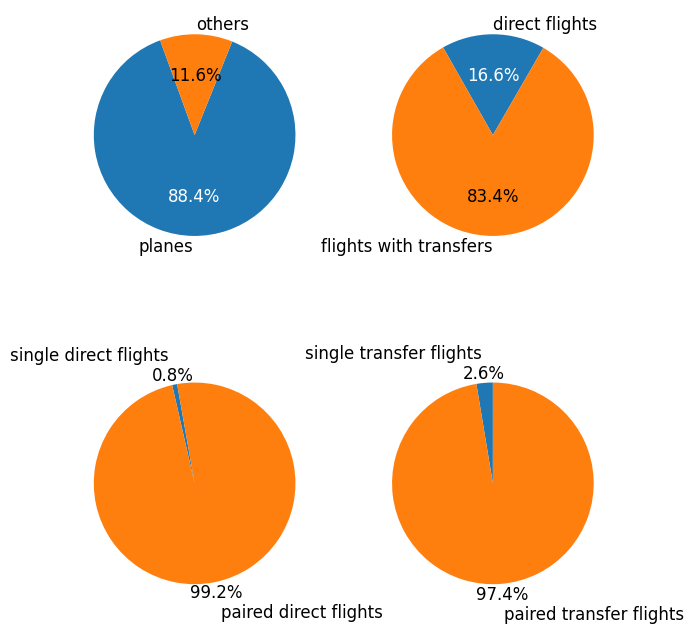

In [227]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(6, 7)
fig.tight_layout(pad=0.25)
_, _, autotexts = axs[0, 0].pie(frac_ttypes, labels=ttypes, autopct='%1.1f%%', labeldistance=1.1, radius=1, textprops={'color':"k", 'size':"large"}, startangle=110)
autotexts[0].set_color('w')
_, _, autotexts = axs[0, 1].pie(frac_flights, labels=type_of_flights, autopct='%1.1f%%', labeldistance=1.1, radius=1, textprops={'color':"k", 'size':"large"}, startangle=60)
autotexts[0].set_color('w')
axs[1, 0].pie(frac_type_of_direct_flights, labels=type_of_direct_flights, autopct='%1.1f%%', labeldistance=1.3, radius=1, startangle=100, pctdistance=1.1, textprops={'color':"k", 'size':"large"})
axs[1, 1].pie(frac_type_of_transfer_flights, labels=type_of_transfer_flights, autopct='%1.1f%%', labeldistance=1.3, radius=1, startangle=90, pctdistance=1.1, textprops={'color':"k", 'size':"large"})
#plt.setp(autotexts, size=18)
plt.show()